In [40]:
import pdal
import smrf
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Using a JSON file

In [ ]:
# A simple example from https://github.com/PDAL/python

In [3]:
json = """
[
    "data/DK22_partial.las",
    {
        "type": "filters.sort",
        "dimension": "X"
    }
]
"""

pipeline = pdal.Pipeline(json)
count = pipeline.execute()
arrays = pipeline.arrays
metadata = pipeline.metadata
log = pipeline.log

In [4]:
arrays

[array([(864603.79998779, 1917280.08994141, 868.37997314, 13, 2, 2, 0, 0, 12, 0., 0, 53, 397421.33238853, 0, 0, 0),
        (864603.82998779, 1917280.08994141, 868.46997314, 13, 1, 2, 0, 0, 12, 0., 0, 53, 397421.33238853, 0, 0, 0),
        (864603.85998779, 1917240.37994141, 847.42997314,  6, 1, 2, 0, 0, 12, 0., 0, 53, 397421.13243736, 0, 0, 0),
        ...,
        (868172.52998779, 1918927.71994141, 844.51997314, 44, 2, 2, 0, 0, 12, 0., 0, 22, 174092.03636802, 0, 0, 0),
        (868172.52998779, 1917653.29994141, 849.78997314, 37, 2, 2, 0, 0, 12, 0., 0, 22, 174084.67699302, 0, 0, 0),
        (868172.52998779, 1917514.04994141, 850.90997314, 14, 2, 2, 0, 0, 12, 0., 0, 22, 174083.80199302, 0, 0, 0)],
       dtype=[('X', '<f8'), ('Y', '<f8'), ('Z', '<f8'), ('Intensity', '<u2'), ('ReturnNumber', 'u1'), ('NumberOfReturns', 'u1'), ('ScanDirectionFlag', 'u1'), ('EdgeOfFlightLine', 'u1'), ('Classification', 'u1'), ('ScanAngleRank', '<f4'), ('UserData', 'u1'), ('PointSourceId', '<u2'), ('GpsT

In [19]:
arrays[0]['X']

array([864603.79998779, 864603.82998779, 864603.85998779, ...,
       868172.52998779, 868172.52998779, 868172.52998779])

In [8]:
arrays[0][0]

(864603.79998779, 1917280.08994141, 868.37997314, 13, 2, 2, 0, 0, 12, 0., 0, 53, 397421.33238853, 0, 0, 0)

In [14]:
arrays

[array([(864603.79998779, 1917280.08994141, 868.37997314, 13, 2, 2, 0, 0, 12, 0., 0, 53, 397421.33238853, 0, 0, 0),
        (864603.82998779, 1917280.08994141, 868.46997314, 13, 1, 2, 0, 0, 12, 0., 0, 53, 397421.33238853, 0, 0, 0),
        (864603.85998779, 1917240.37994141, 847.42997314,  6, 1, 2, 0, 0, 12, 0., 0, 53, 397421.13243736, 0, 0, 0),
        ...,
        (868172.52998779, 1918927.71994141, 844.51997314, 44, 2, 2, 0, 0, 12, 0., 0, 22, 174092.03636802, 0, 0, 0),
        (868172.52998779, 1917653.29994141, 849.78997314, 37, 2, 2, 0, 0, 12, 0., 0, 22, 174084.67699302, 0, 0, 0),
        (868172.52998779, 1917514.04994141, 850.90997314, 14, 2, 2, 0, 0, 12, 0., 0, 22, 174083.80199302, 0, 0, 0)],
       dtype=[('X', '<f8'), ('Y', '<f8'), ('Z', '<f8'), ('Intensity', '<u2'), ('ReturnNumber', 'u1'), ('NumberOfReturns', 'u1'), ('ScanDirectionFlag', 'u1'), ('EdgeOfFlightLine', 'u1'), ('Classification', 'u1'), ('ScanAngleRank', '<f4'), ('UserData', 'u1'), ('PointSourceId', '<u2'), ('GpsT

In [11]:
metadata

{'metadata': {'filters.sort': {},
  'readers.las': {'comp_spatialreference': '',
   'compressed': False,
   'copc': False,
   'count': 1996322,
   'creation_doy': 336,
   'creation_year': 2017,
   'dataformat_id': 3,
   'dataoffset': 227,
   'filesource_id': 0,
   'global_encoding': 0,
   'global_encoding_base64': 'AAA=',
   'header_size': 227,
   'major_version': 1,
   'maxx': 868172.53,
   'maxy': 1919703.2,
   'maxz': 1124.439941,
   'minor_version': 2,
   'minx': 864603.8,
   'miny': 1917226.69,
   'minz': 813.9099731,
   'offset_x': 864603.799987793,
   'offset_y': 1917226.68994141,
   'offset_z': 813.909973144531,
   'point_length': 34,
   'project_id': '00000000-0000-0000-0000-000000000000',
   'scale_x': 0.01,
   'scale_y': 0.01,
   'scale_z': 0.01,
   'software_id': 'libLAS 1.8.0',
   'spatialreference': '',
   'srs': {'compoundwkt': '',
    'horizontal': '',
    'isgeocentric': False,
    'isgeographic': False,
    'prettycompoundwkt': '',
    'prettywkt': '',
    'proj4': ''

# A piped example

In [17]:
fn_in = 'data/DK22_partial.las'
fn_out = 'ground.las'

# Commands can be chaned together with the pipe:
pipeline = pdal.Reader(fn_in) | pdal.Filter.smrf(slope=0.2,threshold=0.45,window=5,cell=5)
# Or added afterward like so:
pipeline |= pdal.Writer(filename=fn_out)
count = pipeline.execute()

# Running Python SMRF

In [26]:
fn_in = 'data/DK22_partial.las'
fn_out = 'ground.las'

# Commands can be chaned together with the pipe:
pipeline = pdal.Reader(fn_in).pipeline()
pipeline.execute()

arr = pipeline.arrays[0]

In [31]:
Zsmrf,Tsmrf,obj_cells,obj_array = smrf.smrf(arr['X'],arr['Y'],arr['Z'],cellsize=5,windows=3,slope_threshold=.15,
                                            low_filter_slope=1,low_outlier_fill=False)

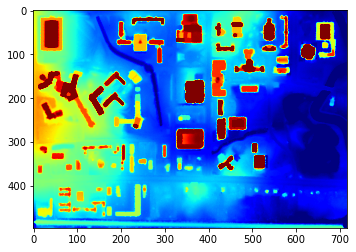

In [42]:
plt.imshow(Zsmrf,vmin=np.percentile(Zsmrf,5),vmax=np.percentile(Zsmrf,95),cmap='jet')

In [39]:
new_class = np.ones_like(arr['Classification'])
new_class[~obj_array] = 2

In [45]:
arr['Classification'] = new_class

In [46]:
pipeline = pdal.Writer.las(
    filename="smrfed.las",
    offset_x="auto",
    offset_y="auto",
    offset_z="auto",
    scale_x=0.01,
    scale_y=0.01,
    scale_z=0.01,
).pipeline(arr)

In [47]:
pipeline.execute()

1996322